<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1">Data Preparation</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-2">Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#New-dataframes" data-toc-modified-id="New-dataframes-2.1">New dataframes</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Side-note---Series" data-toc-modified-id="Side-note---Series-2.1.0.1">Side note - Series</a></span></li></ul></li><li><span><a href="#New-dataframe-based-on-columns-(selecting)" data-toc-modified-id="New-dataframe-based-on-columns-(selecting)-2.1.1">New dataframe based on columns (selecting)</a></span><ul class="toc-item"><li><span><a href="#Select-using-column-names" data-toc-modified-id="Select-using-column-names-2.1.1.1">Select using column names</a></span></li><li><span><a href="#Select-using-.loc[-]" data-toc-modified-id="Select-using-.loc[-]-2.1.1.2">Select using .loc[ ]</a></span></li><li><span><a href="#Select-using-.iloc[-]" data-toc-modified-id="Select-using-.iloc[-]-2.1.1.3">Select using .iloc[ ]</a></span></li></ul></li><li><span><a href="#New-dataframe-based-on-rows-(slicing)" data-toc-modified-id="New-dataframe-based-on-rows-(slicing)-2.1.2">New dataframe based on rows (slicing)</a></span><ul class="toc-item"><li><span><a href="#When-a-column-is-used-as-the-row-index" data-toc-modified-id="When-a-column-is-used-as-the-row-index-2.1.2.1">When a column is used as the row index</a></span></li><li><span><a href="#Slice-using-iloc[-]" data-toc-modified-id="Slice-using-iloc[-]-2.1.2.2">Slice using iloc[ ]</a></span></li></ul></li><li><span><a href="#New-dataframe-based-on-rows-and-columns-(indexing)" data-toc-modified-id="New-dataframe-based-on-rows-and-columns-(indexing)-2.1.3">New dataframe based on rows and columns (indexing)</a></span></li><li><span><a href="#New-dataframe-based-on-row-filtering" data-toc-modified-id="New-dataframe-based-on-row-filtering-2.1.4">New dataframe based on row filtering</a></span></li></ul></li></ul></li><li><span><a href="#New-Columns" data-toc-modified-id="New-Columns-3">New Columns</a></span></li><li><span><a href="#Group-By" data-toc-modified-id="Group-By-4">Group By</a></span><ul class="toc-item"><li><span><a href="#Basics" data-toc-modified-id="Basics-4.1">Basics</a></span></li><li><span><a href="#Create-a-new-dataframe-for-grouped-data" data-toc-modified-id="Create-a-new-dataframe-for-grouped-data-4.2">Create a new dataframe for grouped data</a></span></li></ul></li><li><span><a href="#Using-the-penguin-dataset" data-toc-modified-id="Using-the-penguin-dataset-5">Using the penguin dataset</a></span></li><li><span><a href="#Transforming-Data" data-toc-modified-id="Transforming-Data-6">Transforming Data</a></span></li><li><span><a href="#Filtering-data" data-toc-modified-id="Filtering-data-7">Filtering data</a></span></li><li><span><a href="#Group-by-multiple-categories" data-toc-modified-id="Group-by-multiple-categories-8">Group by multiple categories</a></span></li><li><span><a href="#Group-by-numerical-data-using-.cut()-and-.qcut()" data-toc-modified-id="Group-by-numerical-data-using-.cut()-and-.qcut()-9">Group by numerical data using .cut() and .qcut()</a></span></li><li><span><a href="#Return-to-the-Beer-notebook-and-complete-part-2" data-toc-modified-id="Return-to-the-Beer-notebook-and-complete-part-2-10">Return to the Beer notebook and complete part 2</a></span></li></ul></div>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from numpy.random import randn
pd.set_option("display.precision", 1)
sns.set_style('white')

In [ ]:
df_original = pd.read_csv('https://raw.githubusercontent.com/jimcody2014/python-data/main/diabetes_inspect.csv')

In [ ]:
df.head()

# Data Preparation

In [ ]:
df = df_original

In [ ]:
df.drop_duplicates(keep = 'first', inplace = True)

df['encounter_id'] = df['encounter_id'].astype(str)
df['patient_nbr'] = df['patient_nbr'].astype(str)
df['admission_type_id'] = df['admission_type_id'].astype(str)
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(str)
df['admission_source_id'] = df['admission_source_id'].astype(str)

short_names = {'admission_type_id':'admin_type', # creating a dict of the names to be changed
               'discharge_disposition_id':'discharge_dispo',
               'admission_source_id':'admin_source',
               'num_lab_procedures':'lab_procedures',
               'num_procedures':'procedures'}

df.rename(columns=short_names, inplace=True)
no_age = df[df['age'].isnull()].index
drop_columns = {'medical_specialty','glyburide-metformin','glipizide-metformin',
                'glimepiride-pioglitazone', 'payer_code', 'weight'}
df = df.drop(columns = drop_columns)

df.num_medications.fillna( df.num_medications.mean(),inplace=True )
df['gender'] = df['gender'].replace({'M':'Male', 'Mle':'Male', 'F':'Female'})
df['gender'] = df['gender'].apply(lambda x:x.lower())
df['gender'] = df['gender'].replace({'?':'male', 'unknown/invalid':'male'})   
df = df.loc[df['age']!= 'xyz']
df = df.loc[df.gender != '?']
df = df.drop(no_age, axis = 0) 
df2 = df                           # This is used for new dataframe examples

In [ ]:
data = {
    'Weather': ['Sunny','Sunny','Sunny','Cloudy','Shower','Shower','Sunny'], 
    'Temperature': [78,76,78,68,70,71,82],
    'Wind': [13,28,16,11,26,27,20],
    'Humidity': [30,96,20,22,79,62,10],
}
weather = pd.DataFrame(data, index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Feature Engineering

- New dataframes
    - a subset of columns
    - a subset of rows
- New columns

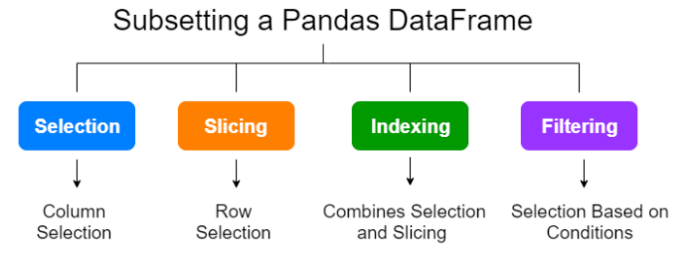

## New dataframes

In [ ]:
df.columns

#### Side note - Series
One row of a dataframe or one columns of a dataframe is referred to as a Series.  A Series is like a list or an array.

In [ ]:
n1 = df.iloc[2]
n2 = df.insulin
print(type(n1))
print(type(n2))

### New dataframe based on columns (selecting)

#### Select using column names

In [ ]:
medications = df[['miglitol', 'insulin', 'glipizide']] # Notice that the columns are passed in as a list
print(type(medications))
print()
print(medications.info())

#### Select using .loc[ ]

In [ ]:
medications2 = df.loc[:,['insulin', 'miglitol']] # Notice that the columns are passed in as a list
print(type(medications2))
print()
print(medications2.info())

#### Select using .iloc[ ]

In [ ]:
medications3 = df.iloc[:,[23,24]] # Notice that the columns are passed in as a list
print(type(medications3))
print()
print(medications3.info())

In [ ]:
medications4 = df.iloc[:,18:25] # Notice that the columns are NOT passed in as a list (because of slicing (the colon))
print(type(medications4))
print()
print(medications4.info())

In [ ]:
del medications
del medications2
del medications3
del medications4

### New dataframe based on rows (slicing)

In [ ]:
weather.head(10)

#### When a column is used as the row index

In [ ]:
rows1 = weather.loc[['Tue', 'Thu', 'Sun'],]
rows1

#### Slice using iloc[ ]

In [ ]:
rows2 = df.iloc[[2,4,6],]  # Notice, you do not need the colon
print(type(rows2))
print()
print(rows2.shape)

In [ ]:
rows3 = df.iloc[3:20,]  # Notice, you do not need the colon
print(type(rows3))
print()
print(rows3.shape)

### New dataframe based on rows and columns (indexing)

In [ ]:
rows4 = df.iloc[3:20,5:10] 
print(type(rows4))
print()
print(rows4.shape)

In [ ]:
rows5 = df.loc[3:20,['insulin','miglitol']] 
print(type(rows5))
print()
print(rows5.shape)

### New dataframe based on row filtering

In [ ]:
df['A1Cresult'] == 'None'

In [ ]:
NoA1C = df[df['A1Cresult'] == 'None'] # If True, put into new dataframe
print(type(NoA1C))
print()
print(NoA1C.shape)

In [ ]:
NoA1C.head()

In [ ]:
NoA1C2 = df[(df['A1Cresult'] == 'None') & (df['time_in_hospital'] > 4)] # Notice parens around test
print(type(NoA1C2))
print()
print(NoA1C2.shape)

In [ ]:
NoA1C3 = df[(df['A1Cresult'] == 'None') | (df['time_in_hospital'] > 4)] # Notice parens around test
print(type(NoA1C3))
print()
print(NoA1C3.shape)

In [ ]:
NoA1C4 = df[df['lab_procedures'].between(11,25)] 
print(type(NoA1C4))
print()
print(NoA1C4.shape)
print()
print(NoA1C4.head())

# New Columns

In [80]:
df['new1'] = df.procedures+1

In [81]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admin_type,discharge_dispo,admin_source,time_in_hospital,lab_procedures,...,metformin,glimepiride,glipizide,glyburide,tolbutamide,miglitol,insulin,diabetesMed,readmitted,new1
2,64410,86047875,AfricanAmerican,female,[20-30),1,1,7,2,11,...,No,No,Steady,No,No,No,No,Yes,NO,6
3,500364,82442376,Caucasian,male,[30-40),1,1,7,2,44,...,No,No,No,No,No,No,Up,Yes,NO,2
4,16680,42519267,Caucasian,male,[40-50),1,1,7,1,51,...,No,No,Steady,No,No,No,Steady,Yes,NO,1
5,35754,82637451,Caucasian,male,[50-60),2,1,2,3,31,...,No,No,No,No,No,No,Steady,Yes,>30,7
6,55842,84259809,Caucasian,male,[60-70),3,1,2,4,70,...,Steady,Steady,No,No,No,No,Steady,Yes,NO,2


apply() is a dataframe method that replaces loops.  It takes a function as input and applies it to all rows of the dataframe.

In [82]:
df['new2'] = df['gender'].apply(lambda x:x.upper())

In [83]:
df['new3'] = df['procedures'].apply(lambda x:x*2)

In [84]:
# The Row object is a read-only dictionary-like structure which contains the cell values for a particular row. 
def do_math(row):
    return row['procedures'] + row['lab_procedures']

In [85]:
df['new4'] = df.apply(do_math, axis=1)

In [86]:
df['new5'] = df.procedures + df.lab_procedures

In [87]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admin_type,discharge_dispo,admin_source,time_in_hospital,lab_procedures,...,tolbutamide,miglitol,insulin,diabetesMed,readmitted,new1,new2,new3,new4,new5
2,64410,86047875,AfricanAmerican,female,[20-30),1,1,7,2,11,...,No,No,No,Yes,NO,6,FEMALE,10,16,16
3,500364,82442376,Caucasian,male,[30-40),1,1,7,2,44,...,No,No,Up,Yes,NO,2,MALE,2,45,45
4,16680,42519267,Caucasian,male,[40-50),1,1,7,1,51,...,No,No,Steady,Yes,NO,1,MALE,0,51,51
5,35754,82637451,Caucasian,male,[50-60),2,1,2,3,31,...,No,No,Steady,Yes,>30,7,MALE,12,37,37
6,55842,84259809,Caucasian,male,[60-70),3,1,2,4,70,...,No,No,Steady,Yes,NO,2,MALE,2,71,71


In [88]:
# Sample of a user defined function being used

# def clean_text_round1(text):  
#     text = text.lower()
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     text = re.sub('\w*\d\w*', '', text)
#     text = re.sub('[‘’“”…]', '', text)
#     text = re.sub('\n', '', text)
#     return text

# round1 = lambda x: clean_text_round1(x)

# latuda.review = pd.DataFrame(latuda.review.apply(round1))

# Group By

## Basics

Information we might be interested in:
- For each gender, what is the mean for every numeric column? What are they by age group?
- For each gender, what is the mean value of procedures?
- How many rows are there in each group when the group is gender?
- By gender, what are the min, max and median values for number of medications(individualy)?

In [89]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'admin_type',
       'discharge_dispo', 'admin_source', 'time_in_hospital', 'lab_procedures',
       'procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'max_glu_serum',
       'A1Cresult', 'metformin', 'glimepiride', 'glipizide', 'glyburide',
       'tolbutamide', 'miglitol', 'insulin', 'diabetesMed', 'readmitted',
       'new1', 'new2', 'new3', 'new4', 'new5'],
      dtype='object')

In [90]:
df.groupby('gender').mean()  

,time_in_hospital,lab_procedures,procedures,num_medications,number_outpatient,number_emergency,number_inpatient,new1,new3,new4,new5
gender,,,,,,,,,,,
female,4.5,43.2,1.2,16.2,0.4,0.2,0.7,2.2,2.5,44.4,44.4
male,4.3,43.0,1.4,15.8,0.4,0.2,0.6,2.4,2.9,44.5,44.5


In [91]:
df.groupby('gender').procedures.mean() # Requesting the mean of one column

gender
female    1.2
male      1.4
Name: procedures, dtype: float64

In [92]:
df.groupby('gender').size()  # .size() provides # of rows in each group

gender
female    54706
male      47058
dtype: int64

In [93]:
df.groupby('gender').num_medications.min()

gender
female    1.0
male      1.0
Name: num_medications, dtype: float64

In [94]:
df.groupby('gender').num_medications.max()

gender
female    75.0
male      81.0
Name: num_medications, dtype: float64

In [95]:
df.groupby('gender').num_medications.median()

gender
female    15.0
male      14.0
Name: num_medications, dtype: float64

In [96]:
df.groupby('gender').num_medications.count()

gender
female    54706
male      47058
Name: num_medications, dtype: int64

In [97]:
# 1 - df.groupby('gender').mean()                     mean for all columns
# 2 - df.groupby('gender').num_medications.min()      mean for a specific column
# 3 -            NEXT                                 multiple agregations for a column(s)

# there is a function called .agg() and it allows specifiying multiple aggregation functions at once

x = df.groupby('gender').procedures.agg(['max', 'min', 'count', 'median', 'mean'])
x

,max,min,count,median,mean
gender,,,,,
female,6,0,54706,1.0,1.2
male,6,0,47058,1.0,1.4


In [98]:
# with custom column name
df.groupby('gender').procedures.agg(
    most=('max'),
    least=('min'),
)

,most,least
gender,,
female,6,0
male,6,0


In [99]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'admin_type',
       'discharge_dispo', 'admin_source', 'time_in_hospital', 'lab_procedures',
       'procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'max_glu_serum',
       'A1Cresult', 'metformin', 'glimepiride', 'glipizide', 'glyburide',
       'tolbutamide', 'miglitol', 'insulin', 'diabetesMed', 'readmitted',
       'new1', 'new2', 'new3', 'new4', 'new5'],
      dtype='object')

## Create a new dataframe for grouped data

In [102]:
x = df.groupby('A1Cresult')  #### Notice no method on the end
x.groups

GT7 = x.get_group('>7')
GT7.head()



,encounter_id,patient_nbr,race,gender,age,admin_type,discharge_dispo,admin_source,time_in_hospital,lab_procedures,...,tolbutamide,miglitol,insulin,diabetesMed,readmitted,new1,new2,new3,new4,new5
26,236316,40523301,Caucasian,male,[80-90),1,3,7,6,64,...,No,No,No,Yes,NO,4,MALE,6,67,67
74,955884,93196251,Caucasian,female,[70-80),1,3,7,5,34,...,No,No,Up,Yes,>30,1,FEMALE,0,34,34
117,1968528,720936,Caucasian,female,[70-80),6,25,1,10,56,...,No,No,Down,Yes,>30,3,FEMALE,4,58,58
148,2371176,966042,Caucasian,female,[50-60),6,25,7,3,18,...,No,No,Steady,Yes,NO,4,FEMALE,6,21,21
203,2664138,8432703,Caucasian,female,[60-70),6,25,1,4,45,...,No,No,No,Yes,>30,1,FEMALE,0,45,45


In [103]:
GT7 = x.get_group('>7')
GT7.head()

,encounter_id,patient_nbr,race,gender,age,admin_type,discharge_dispo,admin_source,time_in_hospital,lab_procedures,...,tolbutamide,miglitol,insulin,diabetesMed,readmitted,new1,new2,new3,new4,new5
26,236316,40523301,Caucasian,male,[80-90),1,3,7,6,64,...,No,No,No,Yes,NO,4,MALE,6,67,67
74,955884,93196251,Caucasian,female,[70-80),1,3,7,5,34,...,No,No,Up,Yes,>30,1,FEMALE,0,34,34
117,1968528,720936,Caucasian,female,[70-80),6,25,1,10,56,...,No,No,Down,Yes,>30,3,FEMALE,4,58,58
148,2371176,966042,Caucasian,female,[50-60),6,25,7,3,18,...,No,No,Steady,Yes,NO,4,FEMALE,6,21,21
203,2664138,8432703,Caucasian,female,[60-70),6,25,1,4,45,...,No,No,No,Yes,>30,1,FEMALE,0,45,45


In [104]:
x.first()

,encounter_id,patient_nbr,race,gender,age,admin_type,discharge_dispo,admin_source,time_in_hospital,lab_procedures,...,tolbutamide,miglitol,insulin,diabetesMed,readmitted,new1,new2,new3,new4,new5
A1Cresult,,,,,,,,,,,,,,,,,,,,,
>7,236316,40523301,Caucasian,male,[80-90),1,3,7,6,64,...,No,No,No,Yes,NO,4,MALE,6,67,67
>8,1257282,84488562,Other,female,[50-60),1,1,7,2,53,...,No,No,Up,Yes,NO,1,FEMALE,0,53,53
None,64410,86047875,AfricanAmerican,female,[20-30),1,1,7,2,11,...,No,No,No,Yes,NO,6,FEMALE,10,16,16
Norm,1270524,67897251,Caucasian,male,[60-70),1,2,7,1,59,...,No,No,Steady,Yes,NO,1,MALE,0,59,59


In [105]:
x.last()

,encounter_id,patient_nbr,race,gender,age,admin_type,discharge_dispo,admin_source,time_in_hospital,lab_procedures,...,tolbutamide,miglitol,insulin,diabetesMed,readmitted,new1,new2,new3,new4,new5
A1Cresult,,,,,,,,,,,,,,,,,,,,,
>7,443842016,183087545,Caucasian,female,[70-80),1,1,7,9,50,...,No,No,Steady,Yes,>30,3,FEMALE,4,52,52
>8,443847548,100162476,AfricanAmerican,male,[70-80),1,3,7,3,51,...,No,No,Down,Yes,>30,1,MALE,0,51,51
None,443867222,175429310,Caucasian,male,[70-80),1,1,7,6,13,...,No,No,No,No,NO,4,MALE,6,16,16
Norm,443835140,175326800,Caucasian,male,[70-80),3,6,1,13,77,...,No,No,Up,Yes,NO,7,MALE,12,83,83


In [106]:
print(type(x))
print(type(GT7))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.frame.DataFrame'>


In [107]:
x.mean()

,time_in_hospital,lab_procedures,procedures,num_medications,number_outpatient,number_emergency,number_inpatient,new1,new3,new4,new5
A1Cresult,,,,,,,,,,,
>7,4.9,53.4,1.3,16.8,0.3,0.1,0.4,2.3,2.6,54.7,54.7
>8,4.7,54.9,1.3,16.1,0.3,0.2,0.5,2.3,2.6,56.2,56.2
None,4.3,40.8,1.3,15.9,0.4,0.2,0.7,2.3,2.7,42.2,42.2
Norm,4.9,54.2,1.3,16.5,0.3,0.2,0.4,2.3,2.5,55.4,55.4


# Using the penguin dataset

It has a wider range of values

In [108]:
df = sns.load_dataset('penguins')

In [109]:
# with custom column name
df.groupby('sex').body_mass_g.agg(
    sex_max=('max'),
    sex_min=('min'),
)

,sex_max,sex_min
sex,,
Female,5200.0,2700.0
Male,6300.0,3250.0


In [110]:
# Custom aggregation function
def categorize(x):
    m = x.mean()
    return True if m > 4000 else False

df.groupby('sex').body_mass_g.agg(['max', 'mean', categorize])

,max,mean,categorize
sex,,,
Female,5200.0,3862.3,False
Male,6300.0,4545.7,True


In [111]:
# Use lambda
df.groupby('sex').body_mass_g.agg(
    ['max', 'mean', lambda x: True if x.mean() > 4000 else False]
)

,max,mean,<lambda_0>
sex,,,
Female,5200.0,3862.3,False
Male,6300.0,4545.7,True


In [112]:
# REMINDER
# With a groupby, a specific column for the aggregation does not have to be specified. 
# Without a column, it will perform the aggregation across all of the numeric columns 

df.groupby('sex').mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
sex,,,,
Female,42.1,16.4,197.4,3862.3
Male,45.9,17.9,204.5,4545.7


In [113]:
df.groupby('sex').agg(['mean', 'median'])

bill_length_mm        bill_depth_mm        flipper_length_mm         \
                 mean median          mean median              mean median   
sex                                                                          
Female           42.1   42.8          16.4   17.0             197.4  193.0   
Male             45.9   46.8          17.9   18.4             204.5  200.5   

       body_mass_g          
              mean  median  
sex                         
Female      3862.3  3650.0  
Male        4545.7  4300.0

# Transforming Data

In [114]:
# A lambda expression for Standardization.
standardization = lambda x: (x - x.mean()) / x.std()

In [115]:
df.groupby('sex').body_mass_g.transform(standardization)

0     -1.0e+00
1     -9.3e-02
2     -9.2e-01
4     -6.2e-01
5     -1.1e+00
        ...   
338    1.6e+00
340    1.5e+00
341    1.5e+00
342    2.0e+00
343    1.1e+00
Name: body_mass_g, Length: 333, dtype: float64

In [116]:
df.groupby('sex').body_mass_g.apply(standardization)

0     -1.0e+00
1     -9.3e-02
2     -9.2e-01
4     -6.2e-01
5     -1.1e+00
        ...   
338    1.6e+00
340    1.5e+00
341    1.5e+00
342    2.0e+00
343    1.1e+00
Name: body_mass_g, Length: 333, dtype: float64

# Filtering data

In [117]:
# How many rows fall into each island group?
df.groupby('island').size()

island
Biscoe       168
Dream        124
Torgersen     52
dtype: int64

In [118]:
# filter data to return all islands that have at least 100 observations.
df.groupby('island').filter(lambda x: len(x) >= 100)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
20,Adelie,Biscoe,37.8,18.3,174.0,3400.0,Female
21,Adelie,Biscoe,37.7,18.7,180.0,3600.0,Male
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,Female
23,Adelie,Biscoe,38.2,18.1,185.0,3950.0,Male
24,Adelie,Biscoe,38.8,17.2,180.0,3800.0,Male
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# Group by multiple categories

In [119]:
# Creating a df that is a subset of penguins

small = df.loc[:, ['species', 'island', 'bill_depth_mm', 'bill_length_mm']]
small

,species,island,bill_depth_mm,bill_length_mm
0,Adelie,Torgersen,18.7,39.1
1,Adelie,Torgersen,17.4,39.5
2,Adelie,Torgersen,18.0,40.3
3,Adelie,Torgersen,NaN,NaN
4,Adelie,Torgersen,19.3,36.7
...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN
340,Gentoo,Biscoe,14.3,46.8
341,Gentoo,Biscoe,15.7,50.4
342,Gentoo,Biscoe,14.8,45.2


In [120]:
# Grouping by multiple categories

small.groupby(['species', 'island']).mean()

bill_depth_mm  bill_length_mm
species   island                                  
Adelie    Biscoe              18.4            39.0
          Dream               18.3            38.5
          Torgersen           18.4            39.0
Chinstrap Dream               18.4            48.8
Gentoo    Biscoe              15.0            47.5

In [121]:
df.groupby(['species', 'island']).mean()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   island                                                        
Adelie    Biscoe               39.0           18.4              188.8   
          Dream                38.5           18.3              189.7   
          Torgersen            39.0           18.4              191.2   
Chinstrap Dream                48.8           18.4              195.8   
Gentoo    Biscoe               47.5           15.0              217.2   

                     body_mass_g  
species   island                  
Adelie    Biscoe          3709.7  
          Dream           3688.4  
          Torgersen       3706.4  
Chinstrap Dream           3733.1  
Gentoo    Biscoe          5076.0

In [122]:
# Group by multi column
df_groupby_multi = small.groupby(['species', 'island']).mean()
df_groupby_multi

bill_depth_mm  bill_length_mm
species   island                                  
Adelie    Biscoe              18.4            39.0
          Dream               18.3            38.5
          Torgersen           18.4            39.0
Chinstrap Dream               18.4            48.8
Gentoo    Biscoe              15.0            47.5

In [123]:
df_groupby_multi.reset_index()

,species,island,bill_depth_mm,bill_length_mm
0,Adelie,Biscoe,18.4,39.0
1,Adelie,Dream,18.3,38.5
2,Adelie,Torgersen,18.4,39.0
3,Chinstrap,Dream,18.4,48.8
4,Gentoo,Biscoe,15.0,47.5


In [124]:
# A better way is to set as_index=False
small.groupby(['species', 'island'], as_index=False).mean()

,species,island,bill_depth_mm,bill_length_mm
0,Adelie,Biscoe,18.4,39.0
1,Adelie,Dream,18.3,38.5
2,Adelie,Torgersen,18.4,39.0
3,Chinstrap,Dream,18.4,48.8
4,Gentoo,Biscoe,15.0,47.5


<AxesSubplot:xlabel='species'>

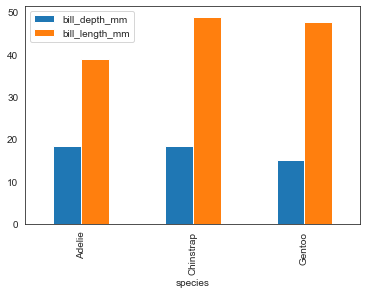

In [125]:
small.groupby('species').mean().plot(kind='bar')  # This is actually a pandas plot

# Group by numerical data using .cut() and .qcut()

In [126]:
df['mass_group'] = pd.cut(df['body_mass_g'], 
                          bins=[0, 3000, 4000, 5000, 10000],
                          labels=('small', 'medium','large', 'wow'))
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,mass_group
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,medium
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,medium
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,medium
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,medium


In [127]:
df.groupby('mass_group').agg(["mean", "median"])

bill_length_mm        bill_depth_mm        flipper_length_mm  \
                     mean median          mean median              mean   
mass_group                                                                
small                38.1   37.3          17.2   16.9             186.0   
medium               41.5   39.7          18.1   18.0             190.6   
large                45.0   45.3          16.6   15.2             206.1   
wow                  49.3   49.3          15.6   15.7             221.1   

                  body_mass_g          
           median        mean  median  
mass_group                             
small       187.0      2900.0  2900.0  
medium      190.0      3576.1  3600.0  
large       209.0      4512.6  4500.0  
wow         221.0      5501.6  5500.0

In [128]:
df.groupby(pd.cut(df['body_mass_g'], 
                          bins=[0, 3000, 4000, 5000, 10000],
                          labels=('small', 'medium','large', 'wow'))).mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
body_mass_g,,,,
small,38.1,17.2,186.0,2900.0
medium,41.5,18.1,190.6,3576.1
large,45.0,16.6,206.1,4512.6
wow,49.3,15.6,221.1,5501.6


In [129]:
df.groupby(pd.qcut(df["body_mass_g"],4, duplicates="drop")).mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
body_mass_g,,,,
"(2699.999, 3550.0]",39.9,17.7,188.6,3297.8
"(3550.0, 4050.0]",43.2,18.5,192.7,3808.0
"(4050.0, 4750.0]",44.4,16.8,203.9,4430.6
"(4750.0, 6300.0]",48.5,15.5,219.3,5333.2


In [130]:
# Just a note....

In [131]:
df.groupby(['species', 'island']).bill_length_mm.sum().reset_index()

,species,island,bill_length_mm
0,Adelie,Biscoe,1714.9
1,Adelie,Dream,2156.1
2,Adelie,Torgersen,1986.5
3,Chinstrap,Dream,3320.7
4,Gentoo,Biscoe,5843.1


In [132]:
# A different way to write he same code
df.groupby(['species', 'island'])['bill_length_mm'].sum().reset_index()

,species,island,bill_length_mm
0,Adelie,Biscoe,1714.9
1,Adelie,Dream,2156.1
2,Adelie,Torgersen,1986.5
3,Chinstrap,Dream,3320.7
4,Gentoo,Biscoe,5843.1


# Return to the Beer notebook and complete part 2